In [1]:
# importing necessary modules
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential, Model
from tensorflow.keras.layers import Dense, concatenate, Input
from tensorflow.keras.datasets import mnist

from tensorflow.keras.utils import plot_model

In [2]:
# List of all physical devices
physical_devices = tf.config.list_physical_devices()
for device in physical_devices:
    print(device)

PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')


**MNIST dataset**


In [3]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (60000, 28, 28)
x_test :  (10000, 28, 28)
y_train :  (60000,)
y_test :  (10000,)


PLOTTING DATASET IMAGES

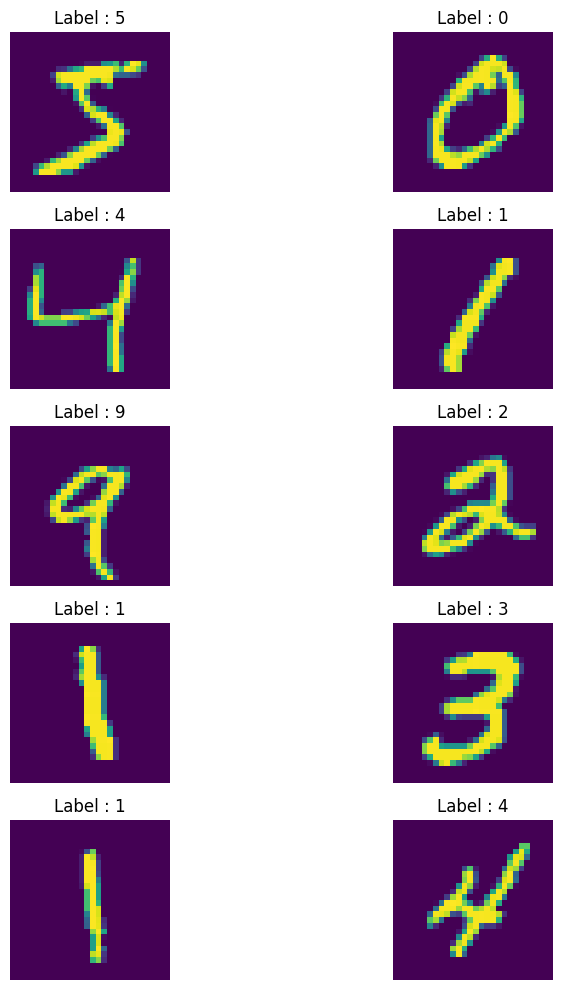

In [6]:
num_images = 10  # Number of images to display

# Create a figure with a specified size
plt.figure(figsize=(10, 10))

for i in range(num_images):
    # Create a subplot in a 5x2 grid
    plt.subplot(5, 2, i + 1)

    # Display the image
    plt.imshow(x_train[i])

    # Remove axis for a cleaner look
    plt.axis('off')

    # Show the corresponding label as title
    plt.title('Label : ' + str(y_train[i]))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the figure
# plt.savefig('mnist_dataset.jpg')

# Show the entire figure
plt.show()

In [7]:
# Reshaping each 28x28 image into a flat vector of size 784 (28 * 28 = 784)
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

# Normalizing the data
# The pixel values in the MNIST dataset range from 0 to 255
x_train = x_train / 255.0
x_test = x_test / 255.0

print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)

x_train :  (60000, 784)
x_test :  (10000, 784)


In [8]:
# Converting the target labels from integer format to one-hot encoded format
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

# first 5 labels
print(y_train[0:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


In [9]:
print('x_train : ', x_train.shape)
print('x_test : ', x_test.shape)
print('y_train : ', y_train.shape)
print('y_test : ', y_test.shape)

x_train :  (60000, 784)
x_test :  (10000, 784)
y_train :  (60000, 10)
y_test :  (10000, 10)


**BUILDING MODEL USING SEQUENTIAL API**

In [10]:
# Initialize the Sequential model
model = Sequential()

# Add the first dense (fully connected) layer with 256 units
# The input shape is 784, corresponding to the flattened 28x28 pixel images
model.add(Dense(256, activation='relu', input_shape=(784,)))

# Add the second dense layer with 256 units
model.add(Dense(256, activation='relu'))

# Add the output layer with 10 units (one for each digit class) and softmax activation
model.add(Dense(10, activation='softmax'))

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/layers/core/dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
# Compiling the model with specified optimizer, loss function, and evaluation metrics
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']     
)

In [12]:
# Model training
model.fit(x_train, y_train, epochs=10, batch_size=1024)

Epoch 1/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.7344 - loss: 1.0237
Epoch 2/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9391 - loss: 0.2152
Epoch 3/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.9565 - loss: 0.1515
Epoch 4/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9685 - loss: 0.1128
Epoch 5/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9751 - loss: 0.0890
Epoch 6/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9784 - loss: 0.0742
Epoch 7/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9819 - loss: 0.0631
Epoch 8/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9865 - loss: 0.0501
Epoch 9/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9884 - loss: 0.0421
Epoch 10/10
59/59 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.9910 - loss: 0.0352


In [13]:
# Model evaluation
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step - accuracy: 0.9739 - loss: 0.0803


[0.06994420289993286, 0.9776999950408936]

In [14]:
# Model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │       200,960 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 807,968 (3.08 MB)

 Trainable params: 269,322 (1.03 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 538,646 (2.05 MB)

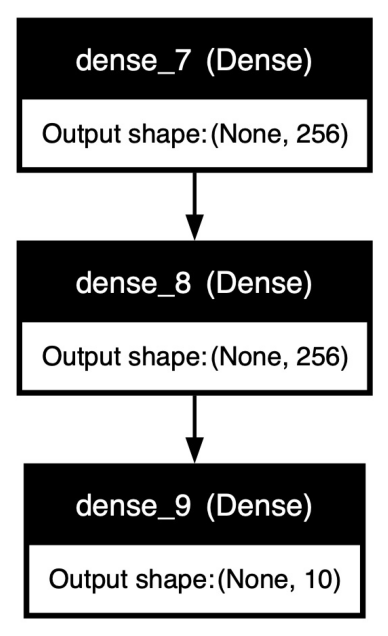

In [15]:
# Plot the model architecture using matplotlib
# plot_model(model, to_file='sequential_model_plot.jpg', show_shapes=True, show_layer_names=True)

img = plt.imread('sequential_model_plot.jpg')
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()

**BUILDING MODEL USING FUNCTIONAL API**

In [16]:
# Define input layer with shape where 784 represents the number of pixels in each image.
input = Input(shape=[784,])

# First hidden layer with 256 neurons and ReLU activation, connected to the input layer.
hidden_layer1 = Dense(256, activation='relu')(input)

# Second hidden layer with 256 neurons and ReLU activation, connected to the first hidden layer.
hidden_layer2 = Dense(256, activation='relu')(hidden_layer1)

# Third hidden layer with 256 neurons and ReLU activation, connected directly to the input layer.
hidden_layer3 = Dense(256, activation='relu')(input)

# Concatenate the outputs of the second and third hidden layers.
concat = concatenate([hidden_layer2, hidden_layer3])

# Output layer with 10 neurons (one for each digit) and softmax activation for multiclass classification.
output = Dense(10, activation='softmax')(concat)


model = Model(inputs=[input], outputs=[output])

# Summary of the model architecture
model.summary()

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1       │ (None, 784)       │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 256)       │    200,960 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 256)       │     65,792 │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │    200,960 │ input_layer_1[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 512)       │          0 │ dense_4[0][0],    │
│ (Concatenate)       │                   │            │ dense_5[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_6 (Dense)     │ (None, 10)        │      5,130 │ concatenate[0][0] │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 472,842 (1.80 MB)

 Trainable params: 472,842 (1.80 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
# Compiling the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Model training
model.fit(x_train, y_train, epochs=5, batch_size=512)

Epoch 1/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.7959 - loss: 0.7278
Epoch 2/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9549 - loss: 0.1558
Epoch 3/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.9705 - loss: 0.0992
Epoch 4/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9807 - loss: 0.0664
Epoch 5/5
118/118 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9854 - loss: 0.0494


In [18]:
# Model evaluation
model.evaluate(x_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 552us/step - accuracy: 0.9725 - loss: 0.0848


[0.07367601245641708, 0.9763000011444092]

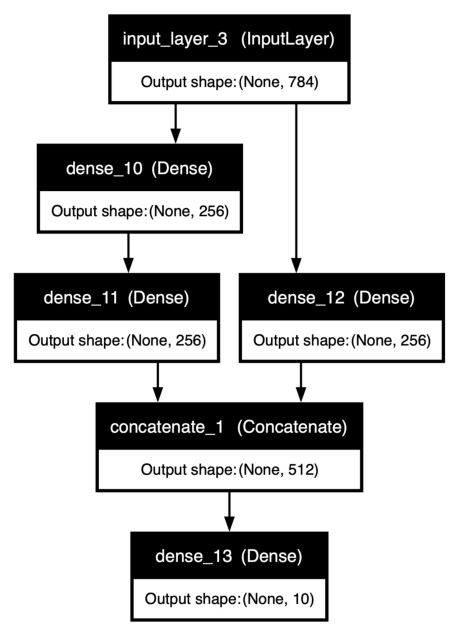

In [19]:

# Plot the model architecture using matplotlib
# plot_model(model, to_file='functional_model_plot.jpg', show_shapes=True, show_layer_names=True)

img = plt.imread('functional_model_plot.jpg')
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.imshow(img)
plt.axis('off')
plt.show()